In [5]:
import gmplot
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

import shapely
import geopandas as gpd

import cPickle as pickle

In [6]:
sf = gpd.read_file('../map_visualization/2010_census_tracts_neighborhoods/census_tracts.shp')
sf = sf.to_crs({'init': 'epsg:4326'})

In [ ]:
def assign_census_tract(df):
    bools = [geom.contains(df['geometry']) for geom in sf['geometry']]
    if True in bools:
        return sf.iloc[bools.index(True)]['tractce10']
    else:
        return np.nan

## missing person

In [33]:
missing = missing.reset_index(drop=True)
missing = gpd.GeoDataFrame(missing, geometry=missing.apply(
        lambda srs: shapely.geometry.Point(srs['x'], srs['y']), axis='columns'
    ))

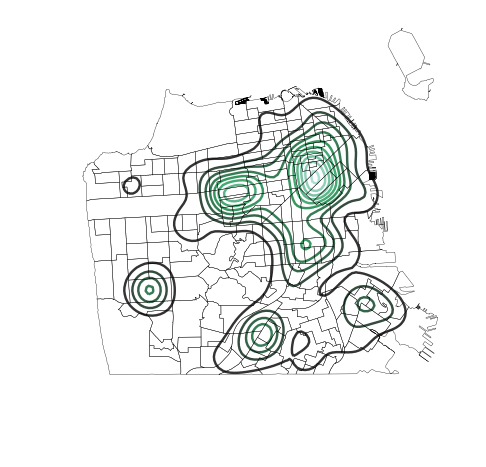

In [34]:
f = plt.figure(figsize=(5, 5))
ax = f.gca()

sf.plot(ax=ax, alpha=0.1, linewidth=0.25, color='white')
sns.kdeplot(data=missing.apply(lambda srs: pd.Series({'x': srs.geometry.x, 'y': srs.geometry.y}), axis='columns'), 
            ax=ax, alpha=1)
ax.set_axis_off()

In [35]:
missing['census_tract'] = missing.apply(assign_census_tract, axis='columns')

In [37]:
missing['census_tract'].value_counts().head()

016500    187
017802    168
033000    121
026001    107
018000     91
Name: census_tract, dtype: int64

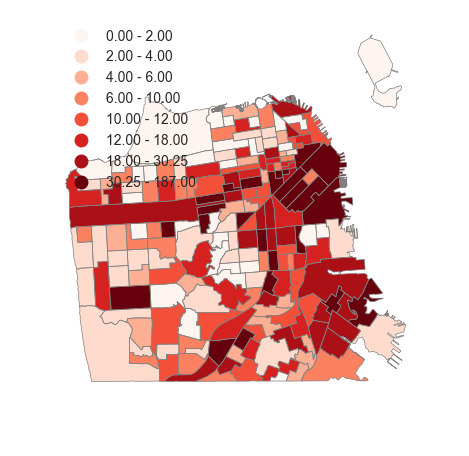

In [44]:
sf['missing'] = sf['tractce10'].map(missing['census_tract'].value_counts())
sf = sf.fillna(0)

f = plt.figure(figsize=(5, 5))
ax = f.gca()
kw = dict(column='missing', k=8, cmap='Reds', alpha=1, legend=True, edgecolor='gray', linewidth=0.5)
sf.plot(scheme='QUANTILES', ax=ax, **kw)
ax.set_axis_off()

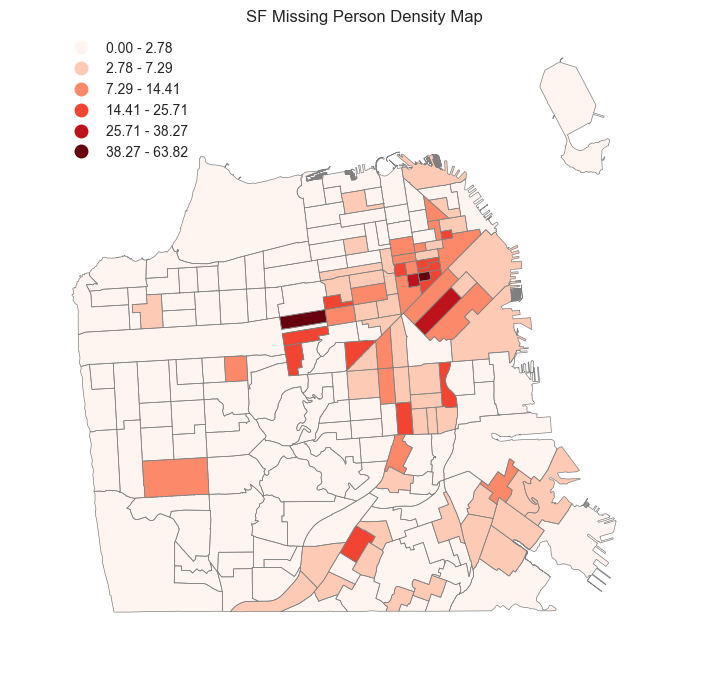

In [69]:
sf['missingDensity'] = (sf['missing'] / (sf['geometry'].to_crs({'init': 'epsg:4326'}).map(lambda p: p.area*10**5))).fillna(0)

f = plt.figure(figsize=(8, 8))
ax = f.gca()
kw = dict(column='missingDensity', k=6, cmap='Reds', alpha=1, legend=True, edgecolor='gray', linewidth=0.5)
sf.plot(scheme='Fisher_Jenks',ax=ax, **kw)
ax.set_axis_off()
ax.set_title('SF Missing Person Density Map')

## prostitution

In [16]:
po = crime_map[crime_map.category == 'prostitution']
po = po.reset_index(drop=True)
po = gpd.GeoDataFrame(po, geometry=po.apply(
        lambda srs: shapely.geometry.Point(srs['x'], srs['y']), axis='columns'
    ))

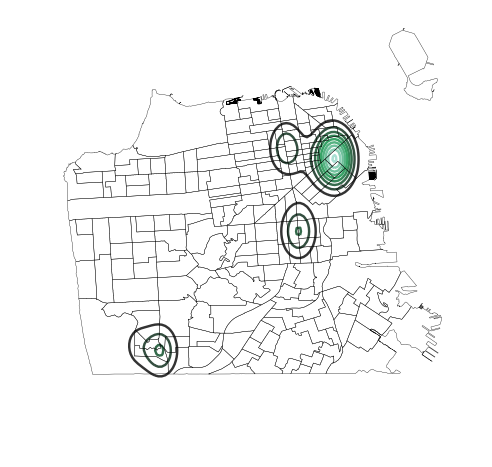

In [17]:
f = plt.figure(figsize=(5, 5))
ax = f.gca()

sf.plot(ax=ax, alpha=0.1, linewidth=0.25, color='white')
sns.kdeplot(data=po.apply(lambda srs: pd.Series({'x': srs.geometry.x, 'y': srs.geometry.y}), axis='columns'), 
            ax=ax, alpha=1)
ax.set_axis_off()

In [18]:
po['census_tract'] = po.apply(assign_census_tract, axis='columns')

In [28]:
po['census_tract'].value_counts()

061500    210
033203     98
011100     65
022801     40
020800     33
012301     12
026302      8
011700      8
061100      5
012302      4
032602      4
017601      3
012402      2
060700      2
022803      2
033204      2
020100      2
011200      1
018000      1
012501      1
016300      1
025702      1
047802      1
022903      1
045100      1
032901      1
032700      1
012401      1
030400      1
011901      1
020300      1
047901      1
015801      1
012202      1
012201      1
015300      1
035201      1
032601      1
011800      1
021000      1
017802      1
Name: census_tract, dtype: int64

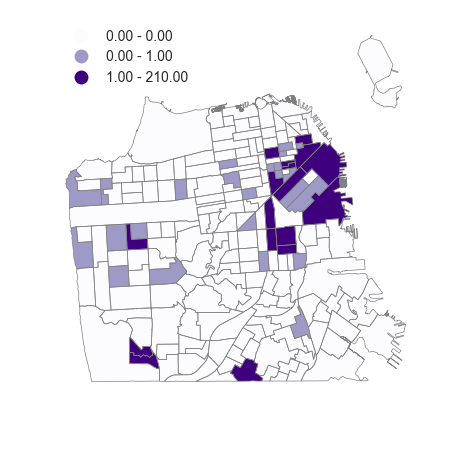

In [29]:
sf['po'] = sf['tractce10'].map(po['census_tract'].value_counts())
sf = sf.fillna(0)

f = plt.figure(figsize=(5, 5))
ax = f.gca()
kw = dict(column='po', k=6, cmap='Purples', alpha=1, legend=True, edgecolor='gray', linewidth=0.5)
sf.plot(scheme='QUANTILES', ax=ax, **kw)
ax.set_axis_off()

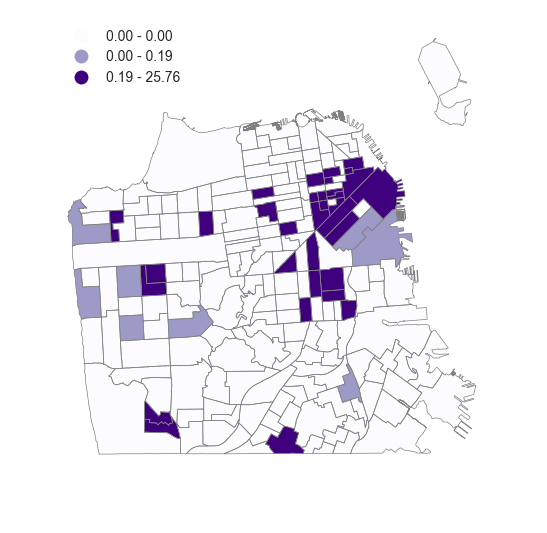

In [31]:
sf['poDensity'] = (sf['po'] / (sf['geometry'].to_crs({'init': 'epsg:4326'}).map(lambda p: p.area*10**5))).fillna(0)

f = plt.figure(figsize=(6, 6))
ax = f.gca()
kw = dict(column='poDensity', k=6, cmap='Purples', alpha=1, legend=True, edgecolor='gray', linewidth=0.5)
sf.plot(scheme='QUANTILES',ax=ax, **kw)
ax.set_axis_off()

## sex

In [47]:
sex = gpd.GeoDataFrame(sex, geometry=sex.apply(
        lambda srs: shapely.geometry.Point(srs['x'], srs['y']), axis='columns'
    ))

In [49]:
sex['census_tract'] = sex.apply(assign_census_tract, axis='columns')

In [61]:
sex['census_tract'].value_counts().head()

018000    58
022802    42
061500    28
017601    28
020100    25
Name: census_tract, dtype: int64

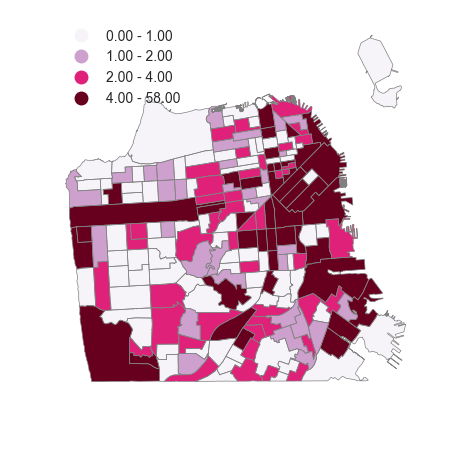

In [57]:
sf['sex'] = sf['tractce10'].map(sex['census_tract'].value_counts())
sf = sf.fillna(0)

f = plt.figure(figsize=(5, 5))
ax = f.gca()
kw = dict(column='sex', k=4, cmap='PuRd', alpha=1, legend=True, edgecolor='gray', linewidth=0.5)
sf.plot(scheme='QUANTILES', ax=ax, **kw)
ax.set_axis_off()

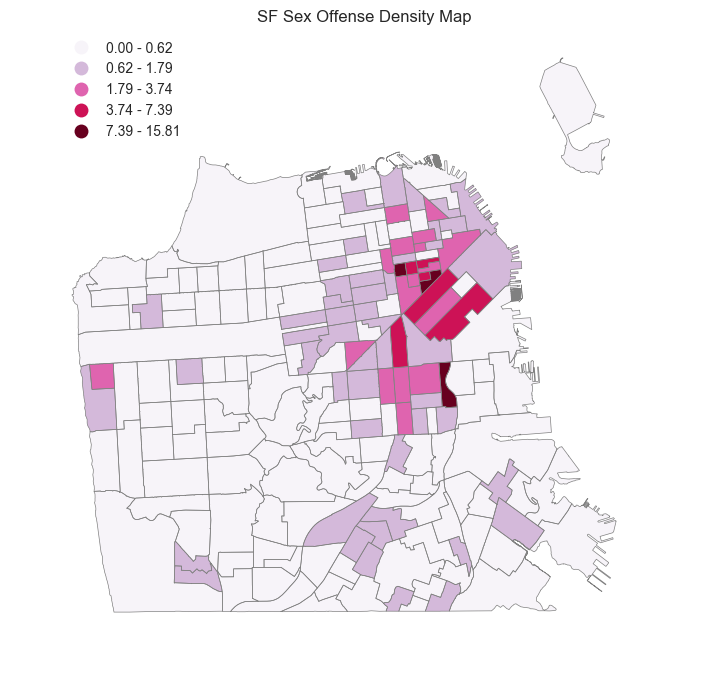

In [66]:
sf['sexDensity'] = (sf['sex'] / (sf['geometry'].to_crs({'init': 'epsg:4326'}).map(lambda p: p.area*10**5))).fillna(0)

f = plt.figure(figsize=(8, 8))
ax = f.gca()
kw = dict(column='sexDensity', k=5, cmap='PuRd', alpha=1, legend=True, edgecolor='gray', linewidth=0.5)
sf.plot(scheme='Fisher_Jenks',ax=ax, **kw)
ax.set_axis_off()
ax.set_title('SF Sex Offense Density Map')

## load and save 

In [4]:
with open('../final_dataset/missing_person.pkl') as handle:
    missing = pickle.load(handle)

In [9]:
with open('../final_dataset/crime2016_origin_modified_col.pkl') as handle:
    crime_map = pickle.load(handle)

In [45]:
with open('../final_dataset/sex.pkl') as handle:
    sex = pickle.load(handle)